In [2]:
import os
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'gulim')
plt.rc('axes', unicode_minus = False)

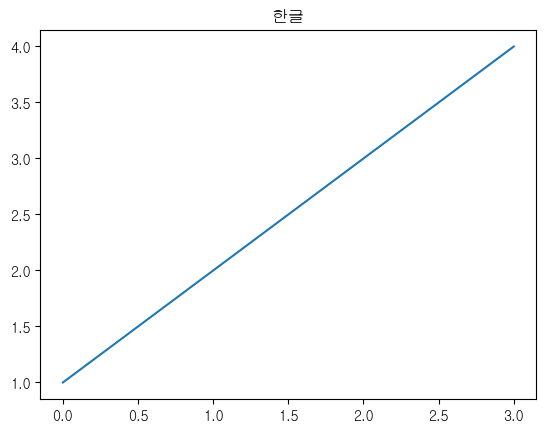

In [15]:
plt.plot([1, 2, 3, 4])
plt.title('한글')
plt.show()

In [17]:
titanic = sns.load_dataset('titanic')
titanic.head()
print('titanic = \n', titanic.head())
print(titanic.info())

titanic = 
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived   

In [22]:
## missing

print('missing value = ')
# print(titanic.isnull().sum())

titanic_df = titanic.loc[:, :'fare']
titanic_df.info()

titanic_df.dropna(axis=0, inplace = True)
titanic_df.info()

missing value = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   fare      714 non-null    float64
dtypes: float64

In [23]:
##
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


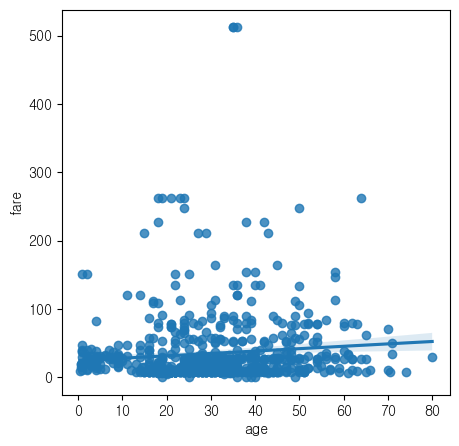

In [27]:
## sns.regplot
fig, ax = plt.subplots(figsize = (5, 5))
sns.regplot(titanic_df, x='age', y='fare')
plt.show()
fig.savefig('titanic_reg.png')

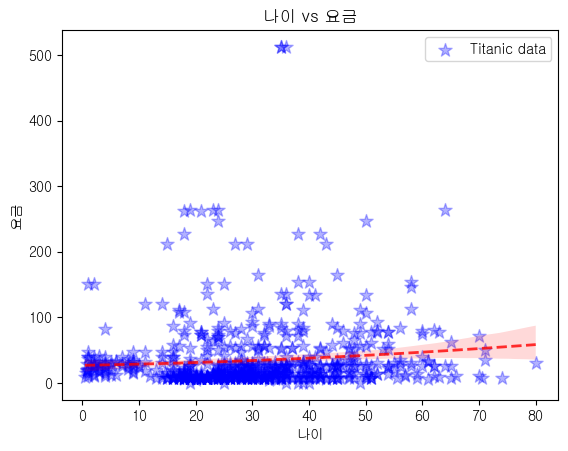

In [50]:
sns.regplot(titanic_df, 
            x = 'age', y = 'fare', 
            fit_reg = True, 
            color = 'red', 
            marker = '*',
            order = 2, # 2차식
            label = 'Titanic data',
            scatter_kws={'fc':'b', 'ec':'b', 's':100, 'alpha':0.3},
            line_kws = {'lw':2, 'ls':'--', 'alpha':0.8})
plt.title('나이 vs 요금')
plt.xlabel('나이')
plt.ylabel('요금')
plt.legend(loc = 0)
plt.show()

In [59]:
##
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


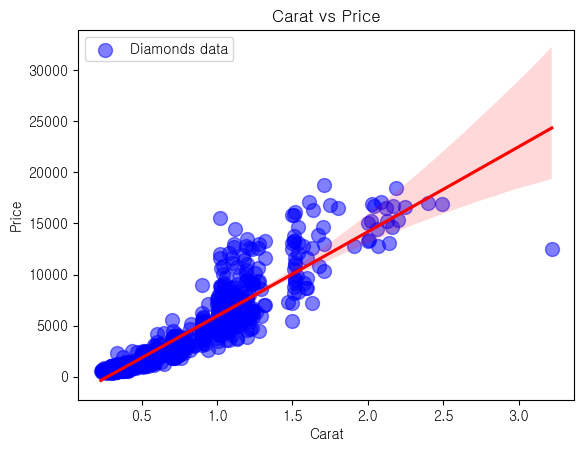

In [75]:
##
# cut = ideal => carat vs price (replot)
diamonds_df = diamonds[diamonds['cut'] == 'Ideal']

sns.regplot(diamonds_df.sample(n=1000), 
            x = 'carat', y = 'price', 
            fit_reg = True, 
            color = 'yellow', 
            order = 2, # 2차식
            label = 'Diamonds data',
            scatter_kws={'fc':'b', 'ec':'b', 's':100, 'alpha':0.5},
            line_kws = {'color':'red'})

plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(loc = 0)
plt.show()


In [76]:
## sns.lmplot

penguins = sns.load_dataset('penguins')
print(penguins.head())
print(penguins['species'].value_counts())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


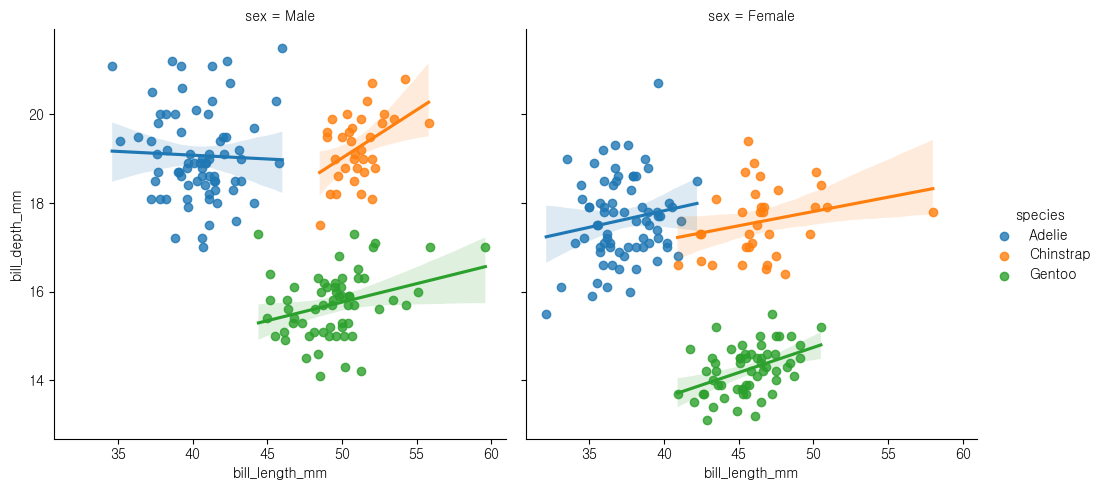

In [82]:
# Figure-level
sns.lmplot(penguins,
            x = 'bill_length_mm', y = 'bill_depth_mm',
            hue = 'species',
            col = 'sex')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


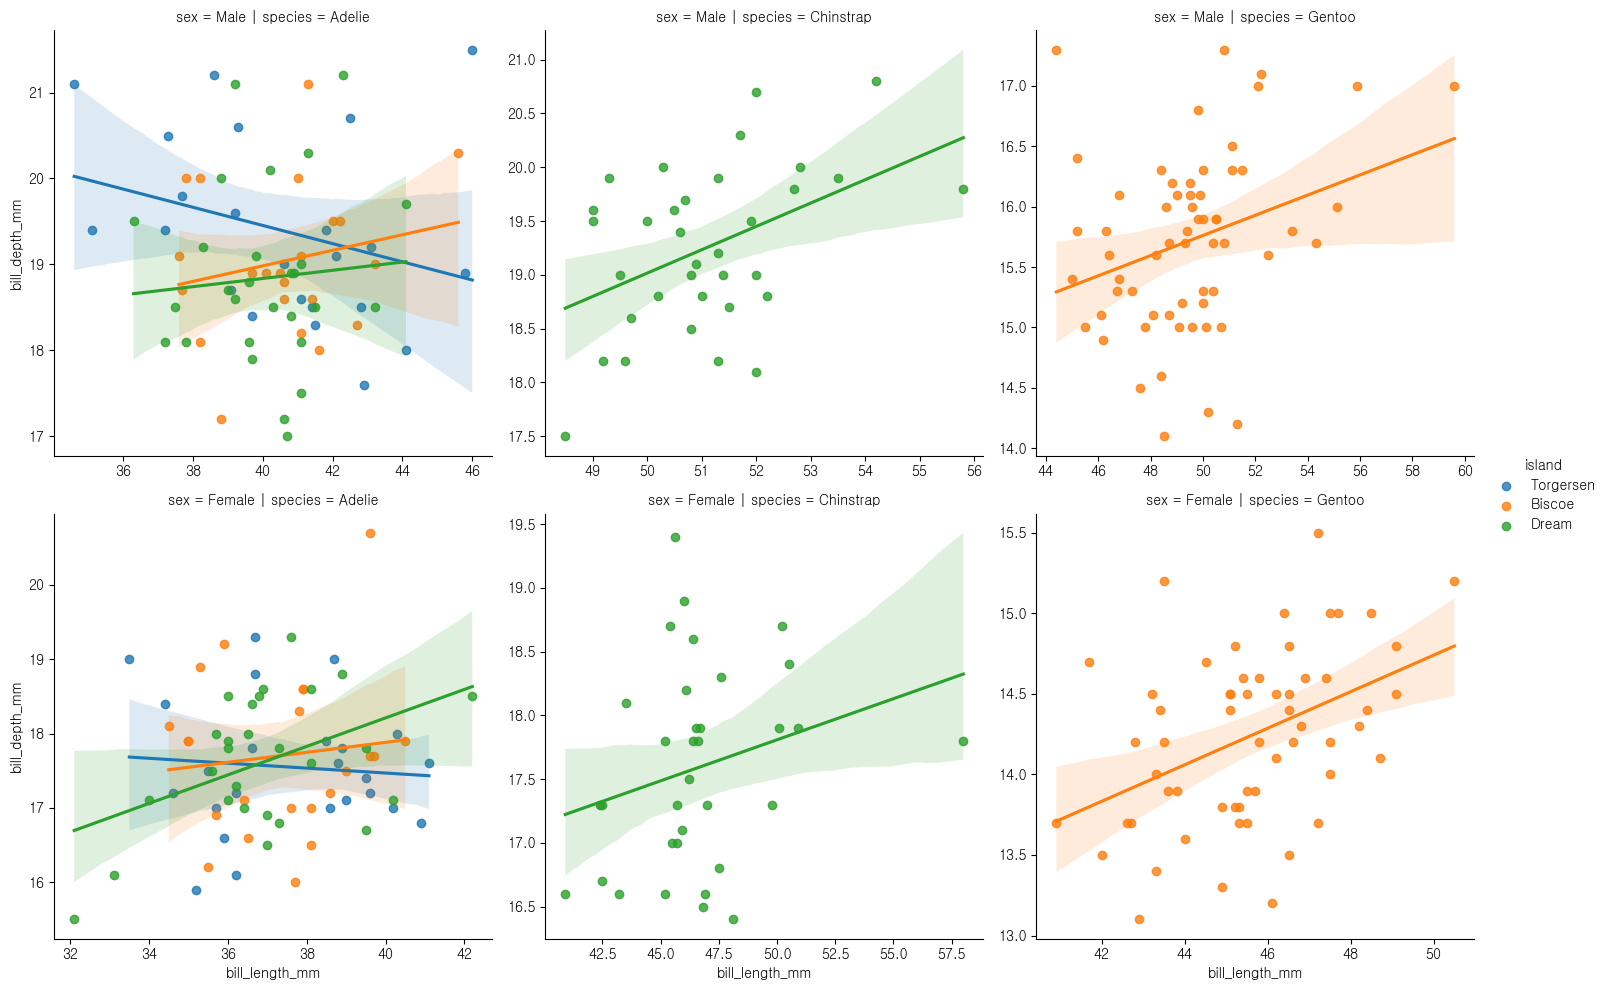

In [89]:
sns.lmplot(penguins,
            x = 'bill_length_mm', 
            y = 'bill_depth_mm',
            col = 'species',
            row = 'sex',
            hue = 'island',
            sharex = False,
            sharey = False)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


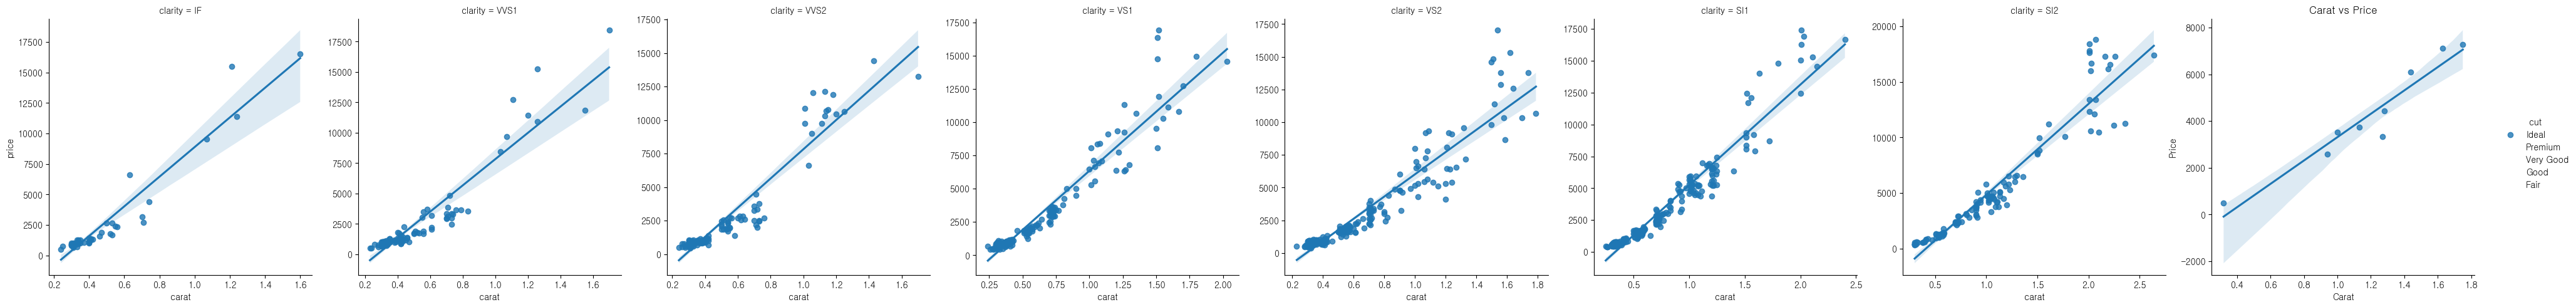

In [91]:
## 
diamonds_df = diamonds[diamonds['cut'] == 'Ideal']

sns.lmplot(diamonds_df.sample(n=1000), 
            x = 'carat', y = 'price', 
            col = 'clarity',
            hue = 'cut',
            sharex = False,
            sharey = False)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [92]:
## sns.scatterplot
tips = sns.load_dataset("tips")
print("tips = \n", tips.head())
print(tips.info())

tips = 
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


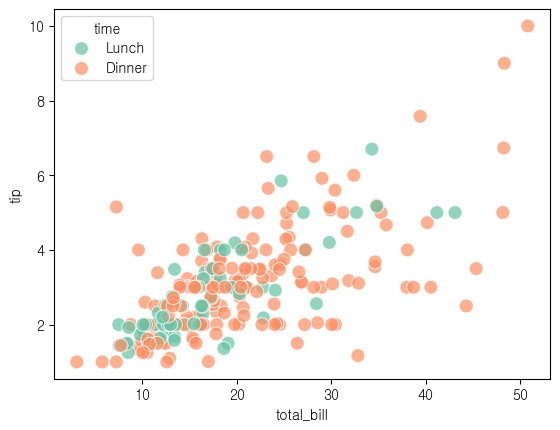

In [93]:
##
sns.scatterplot(tips,
                x = "total_bill",
                y = "tip",
                hue = "time",
                #style = "smoker"   
                s = 100, 
                alpha = 0.7,
                palette = "Set2") 

tips.legends = "time"

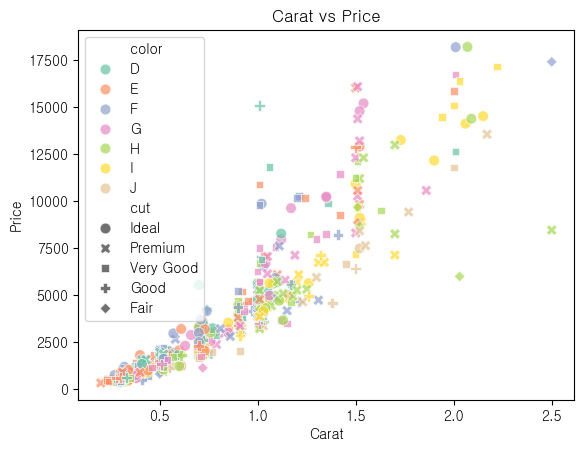

In [112]:
## 
diamonds = sns.load_dataset('diamonds')

sns.scatterplot(diamonds.sample(n=500), 
            x = 'carat', y = 'price', 
            hue = 'color',
            style = 'cut',
            s = 60, 
            alpha = 0.7,
            palette = "Set2") 
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [113]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [122]:
color_idx = (diamonds['color'] == 'D')|(diamonds['color'] == 'E')| (diamonds['color'] == 'F')
cut_idx = (diamonds['cut'] == 'Ideal')|(diamonds['cut'] == 'Good')|(diamonds['cut'] == 'Fair')
final_idx = color_indx & cut_idx
print(final_idx)

diamonds_df = diamonds[final_idx]
diamonds_df['color'] = diamonds_df['color'].cat.remove_unused_categories()
diamonds_df['cut'] = diamonds_df['cut'].cat.remove_unused_categories()
# diamonds_df.shape 

0         True
1        False
2         True
3        False
4        False
         ...  
53935     True
53936     True
53937    False
53938    False
53939     True
Length: 53940, dtype: bool


C:\Users\user\AppData\Local\Temp\ipykernel_4176\3735620765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_df['color'] = diamonds_df['color'].cat.remove_unused_categories()
C:\Users\user\AppData\Local\Temp\ipykernel_4176\3735620765.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_df['cut'] = diamonds_df['cut'].cat.remove_unused_categories()


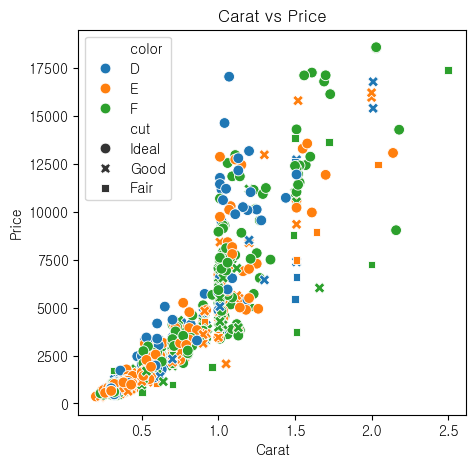

In [123]:
fig, ax = plt.subplots(figsize = (5, 5))

sns.scatterplot(diamonds_df.sample(n = 1000),
                x = 'carat', y = 'price',
                hue = 'color',
                style = 'cut',
                s = 60, 
                ) 

plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [124]:
## 
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


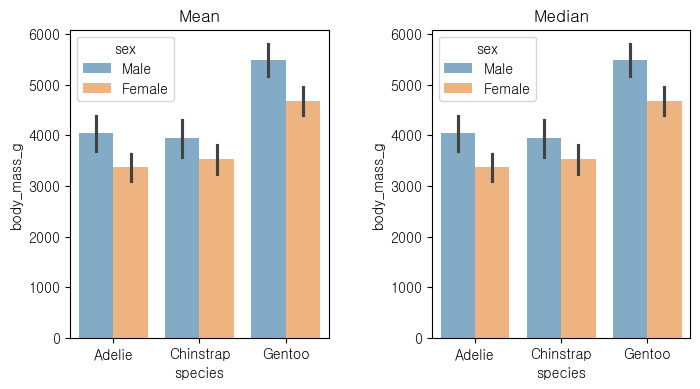

In [140]:
fig, axis = plt.subplots(1, 2, figsize = (8, 4))

sns.barplot(penguins,
            x = 'species',
            y = 'body_mass_g',
            hue = 'sex',
            alpha = 0.6,
            errorbar = 'sd',
            estimator = 'mean', ax = axis[0],)
axis[0].set_title("Mean")

sns.barplot(penguins,
            x = 'species',
            y = 'body_mass_g',
            hue = 'sex',
            alpha = 0.6,
            errorbar = 'sd',
            estimator = 'mean', ax = axis[1])
axis[1].set_title("Median")

plt.subplots_adjust(wspace = 0.4)

plt.show()

In [138]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


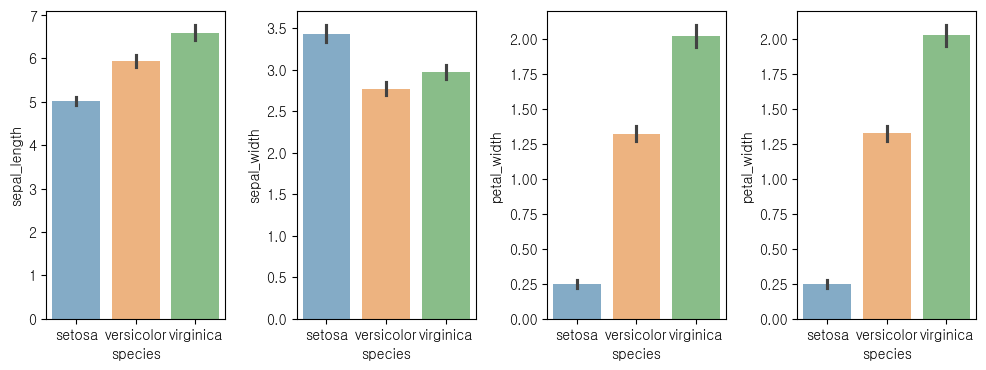

In [149]:
fig, axis = plt.subplots(1, 4, figsize = (12, 4))

sns.barplot(iris,
            x = 'species',
            y = 'sepal_length',
            hue = 'species',
            alpha = 0.6,
            ax = axis[0])

sns.barplot(iris,
            x = 'species',
            y = 'sepal_width',
            hue = 'species',
            alpha = 0.6,
            ax = axis[1])

sns.barplot(iris,
            x = 'species',
            y = 'petal_width',
            hue = 'species',
            alpha = 0.6,
            ax = axis[2])

sns.barplot(iris,
            x = 'species',
            y = 'petal_width',
            hue = 'species',
            alpha = 0.6,
            ax = axis[3])

plt.subplots_adjust(wspace = 0.4)

plt.show()

In [150]:
y_list = iris.columns[:4]

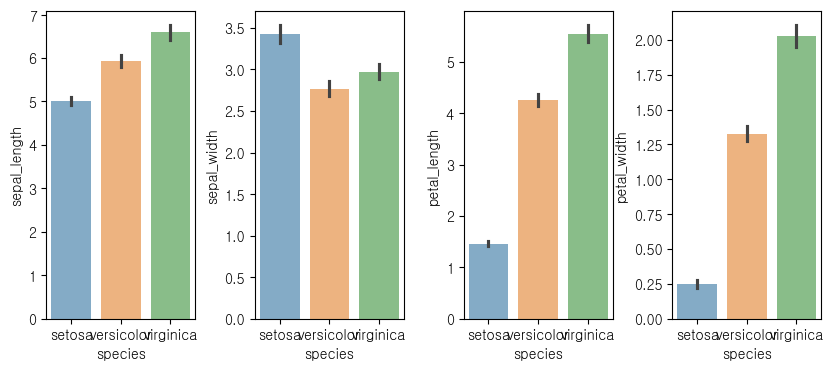

In [152]:
fig, axis = plt.subplots(1, 4, figsize = (10, 4))
for i in range(4):
    sns.barplot(iris,
            x = 'species',
            y = y_list[i],
            hue = 'species',
            alpha = 0.6,
            ax = axis[i])

plt.subplots_adjust(wspace = 0.4)
plt.show()

In [16]:
# 1. Summary table by factor
mpg = pd.read_excel("./dataset/mtcars.xlsx")
mpg

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [20]:
group_cyl = mpg.groupby('cyl')['mpg'].agg(['mean', 'std'])

In [21]:
print(group_cyl)

          mean       std
cyl                     
4    26.663636  4.509828
6    19.742857  1.453567
8    15.100000  2.560048
